In [1]:
from IPython.display import display, Latex, Markdown
import numpy as np
from numpy import linalg as LA
import sympy as sp
import control as ctrl
from control import matlab
import math
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({
                     'figure.figsize':[16,9],
                     'font.size': 22, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'});

In [2]:
# Matrizes:
A = [[-5, 1, 0],[0, -2, 1],[20, -10, 1]];
B = [[0],[0],[1]];
C = [[-1, 1, 0]];
D = np.zeros(shape=(3,1));
I = np.eye(3);

s = sp.symbols('s');

A = sp.Matrix(A);
B = sp.Matrix(B);
C = sp.Matrix(C);
D = sp.Matrix(D);

M = sp.simplify(1-(C*((s*I-A)**-1)*B)[0]);

display(Markdown('### Exemplo:'));
display(Latex('$ \mathbf{A} = '+str(sp.latex(A))+
              '; \quad \mathbf{B} = '+str(sp.latex(B))+
              '; \quad \mathbf{C} = '+str(sp.latex(C))+'$'));
display(Latex('$ e(\infty) = \lim\limits_{s \\to 0} sR(s) \\left( '+str(sp.latex(M))+' \\right) $'));
display(Markdown('### Para o degrau unitário: R(s) $=$ 1/s, e e($\infty$) $=$ 4/5. \
                 Para uma rampa unitária, R(s) $=$ 1/s² e e($\infty$) $=$ $\infty$.'));
display(Markdown('### Verificar no Python (cálculo e simulação):'));

### Exemplo:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Para o degrau unitário: R(s) $=$ 1/s, e e($\infty$) $=$ 4/5.                  Para uma rampa unitária, R(s) $=$ 1/s² e e($\infty$) $=$ $\infty$.

### Verificar no Python (cálculo e simulação):

### Cálculo:

In [3]:
R = 1/s;
ess = sp.limit(s*R*M,s,0);

display(Markdown('### Erro para um degrau unitário:'));
display(Latex('$ e(\infty) = '+str(sp.latex(ess)).replace('.',',')+'$'));

R = 1/(s**2);
ess = sp.limit(s*R*M,s,0);

display(Markdown('### Erro para uma rampa unitária:'));
display(Latex('$ e(\infty) = '+str(sp.latex(ess))+'$'));

### Erro para um degrau unitário:

<IPython.core.display.Latex object>

### Erro para uma rampa unitária:

<IPython.core.display.Latex object>

### Simulação:

### Erro para um degrau unitário:

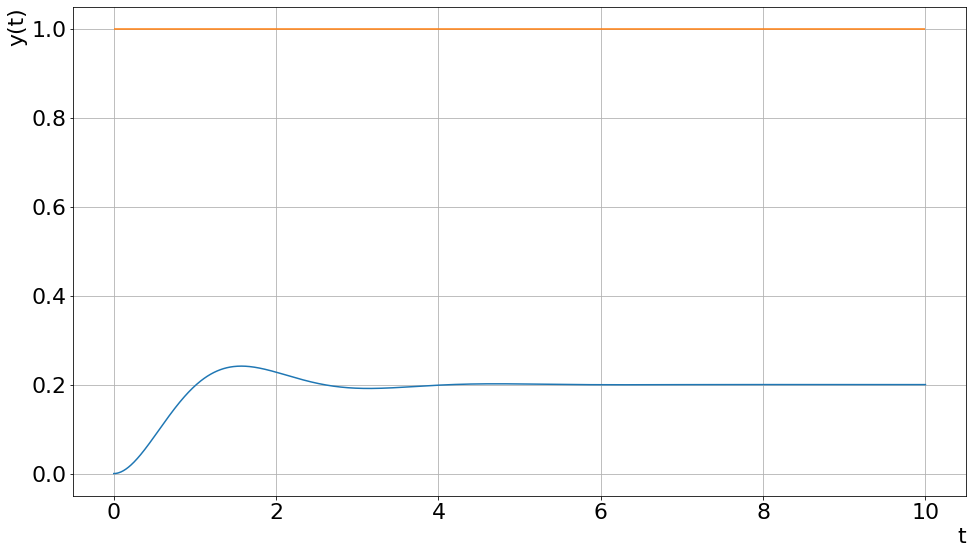

### Erro para uma rampa unitária:

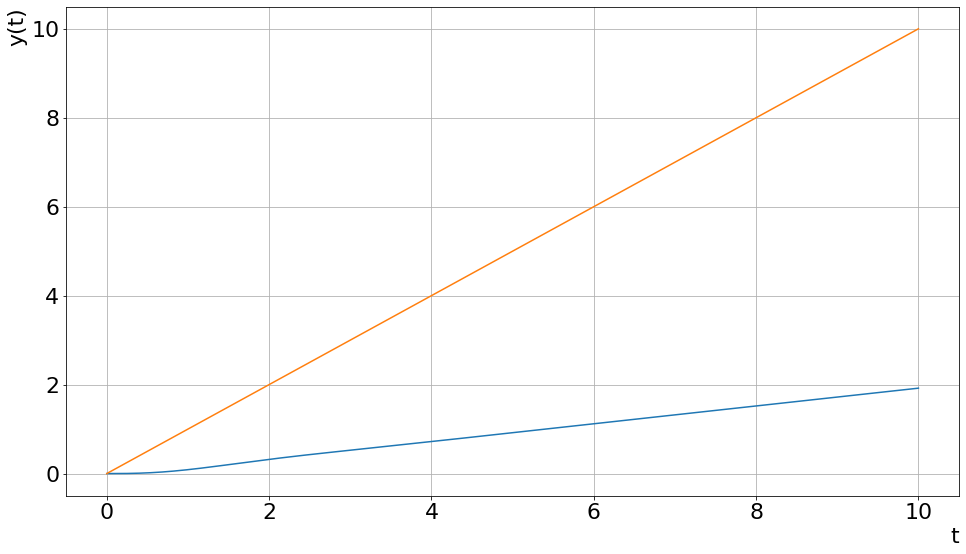

In [4]:
display(Markdown('### Erro para um degrau unitário:'));

# Resposta com o comando lsim:

t1 = np.linspace(0, 10, 999);
u = np.heaviside(t1,1);

# Sistema no espaço de estados:

C = [[-1, 1, 0], [0, 0, 0], [0, 0, 0]];
sistema = ctrl.ss(A,B,C,D);
saida1, t1, x = matlab.lsim(sistema, u, t1);

plt.figure();
plt.plot(t1, saida1.T[0]);
plt.hlines(1, t1[0], t1[-1], colors='tab:orange');
plt.xlabel("t");
plt.ylabel("y(t)");
plt.grid();
plt.show();

display(Markdown('### Erro para uma rampa unitária:'));

saida2, t1, x = matlab.lsim(sistema, t1, t1);

plt.figure();
plt.plot(t1, saida2.T[0], t1, t1);
plt.xlabel("t");
plt.ylabel("y(t)");
plt.grid();
plt.show();

In [5]:
display(Markdown('### Análise por meio da substituição da entrada:'));
display(Markdown('### Entrada do tipo degrau unitário:'));
display(Latex('$ e(\infty) = 1 + \mathbf{CA}^{-1} \mathbf{B}$'));
display(Markdown('### Entrada do tipo rampa unitária:'));
display(Latex('$ e(\infty) = \\left[ \lim\limits_{t \\to \infty} \\left[ 1 + \mathbf{CA}^{-1} \mathbf{B} \\right] t \
              + \mathbf{C} \\left( \mathbf{A}^{-1} \\right)^{2} \mathbf{B} \\right] $'));
display(Markdown('### Exercício: determinar os erros do exemplo anterior, \
                 utilizando as fórmulas de cálculo do erro que consideram a substituição da entrada:'));

### Análise por meio da substituição da entrada:

### Entrada do tipo degrau unitário:

<IPython.core.display.Latex object>

### Entrada do tipo rampa unitária:

<IPython.core.display.Latex object>

### Exercício: determinar os erros do exemplo anterior,                  utilizando as fórmulas de cálculo do erro que consideram a substituição da entrada:

### Cálculo:

In [6]:
C = [[-1, 1, 0]];
C = sp.Matrix(C);

ess = 1 + ((C*(A)**-1)*B)[0];

display(Markdown('### Erro para um degrau unitário:'));
display(Latex('$ e(\infty) = '+str(sp.latex(ess))+'$'));

t = sp.symbols('t', positive=True);

ess = sp.limit((1+((C*(A)**-1)*B)[0])*t, t, 'oo') + ((C*((A)**-1)**2)*B)[0];

display(Markdown('### Erro para uma rampa unitária:'));
display(Latex('$ e(\infty) = '+str(sp.latex(ess))+'$'));

### Erro para um degrau unitário:

<IPython.core.display.Latex object>

### Erro para uma rampa unitária:

<IPython.core.display.Latex object>